In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fashion 360 classification

In [7]:


# Set the path to your dataset
data_dir = 'fruits-360_dataset_100x100/fruits-360/Test'

# Get list of fruit classes
fruit_classes = os.listdir(data_dir)
num_classes = len(fruit_classes)

# Image parameters
img_height, img_width = 100, 100
batch_size = 32

# Create ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)



Found 18954 images belonging to 141 classes.
Found 4665 images belonging to 141 classes.


In [8]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/10
592/592 [==============================] - 192s 303ms/step - loss: 1.6737 - accuracy: 0.6069 - val_loss: 0.5273 - val_accuracy: 0.8562
Epoch 2/10
592/592 [==============================] - 32s 54ms/step - loss: 0.0997 - accuracy: 0.9712 - val_loss: 0.3611 - val_accuracy: 0.9024
Epoch 3/10
592/592 [==============================] - 43s 73ms/step - loss: 0.0567 - accuracy: 0.9835 - val_loss: 0.3135 - val_accuracy: 0.9041
Epoch 4/10
592/592 [==============================] - 31s 51ms/step - loss: 0.0703 - accuracy: 0.9807 - val_loss: 0.4104 - val_accuracy: 0.9069
Epoch 5/10
592/592 [==============================] - 22s 36ms/step - loss: 0.0162 - accuracy: 0.9961 - val_loss: 0.2164 - val_accuracy: 0.9442
Epoch 6/10
592/592 [==============================] - 20s 34ms/step - loss: 0.0530 - accuracy: 0.9868 - val_loss: 0.4346 - val_accuracy: 0.9017
Epoch 7/10
592/592 [==============================] - 21s 35ms/step - loss: 0.0305 - accuracy: 0.9918 - val_loss: 0.3096 - val_accurac

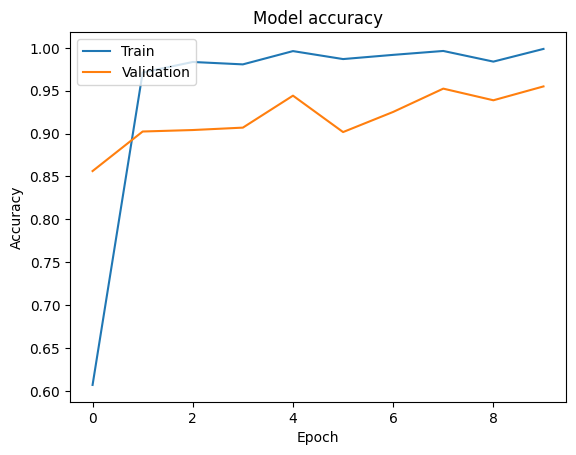

In [9]:
#plot accuracy loss graph
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/10
592/592 [==============================] - 25s 40ms/step - loss: 2.1700 - accuracy: 0.6443 - val_loss: 0.8205 - val_accuracy: 0.8300
Epoch 2/10
592/592 [==============================] - 21s 35ms/step - loss: 0.2725 - accuracy: 0.9672 - val_loss: 0.6882 - val_accuracy: 0.8528
Epoch 3/10
592/592 [==============================] - 21s 35ms/step - loss: 0.1653 - accuracy: 0.9862 - val_loss: 0.5168 - val_accuracy: 0.8991
Epoch 4/10
592/592 [==============================] - 19s 33ms/step - loss: 0.1261 - accuracy: 0.9914 - val_loss: 0.3811 - val_accuracy: 0.9319
Epoch 5/10
592/592 [==============================] - 19s 33ms/step - loss: 0.1247 - accuracy: 0.9878 - val_loss: 0.5931 - val_accuracy: 0.8950
Epoch 6/10
592/592 [==============================] - 19s 32ms/step - loss: 0.1102 - accuracy: 0.9910 - val_loss: 0.5089 - val_accuracy: 0.8918
Epoch 7/10
592/592 [==============================] - 19s 32ms/step - loss: 0.0701 - accuracy: 0.9970 - val_loss: 0.3471 - val_accuracy:

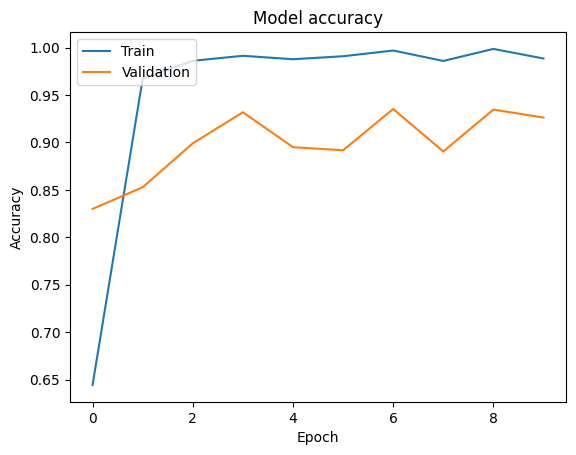

In [12]:
#apply L1 and L2 regularization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l1(l1=0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.4f}')

#plot accuracy loss graph
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/10
592/592 [==============================] - 22s 36ms/step - loss: 1.5013 - accuracy: 0.6795 - val_loss: 0.7306 - val_accuracy: 0.8190
Epoch 2/10
592/592 [==============================] - 18s 30ms/step - loss: 0.1486 - accuracy: 0.9774 - val_loss: 0.4598 - val_accuracy: 0.9114
Epoch 3/10
592/592 [==============================] - 16s 27ms/step - loss: 0.0916 - accuracy: 0.9865 - val_loss: 0.4439 - val_accuracy: 0.8998
Epoch 4/10
592/592 [==============================] - 17s 28ms/step - loss: 0.0560 - accuracy: 0.9929 - val_loss: 0.3366 - val_accuracy: 0.9502
Epoch 5/10
592/592 [==============================] - 17s 29ms/step - loss: 0.0885 - accuracy: 0.9822 - val_loss: 0.6061 - val_accuracy: 0.8795
Epoch 6/10
592/592 [==============================] - 17s 28ms/step - loss: 0.0399 - accuracy: 0.9953 - val_loss: 0.5658 - val_accuracy: 0.9151
Epoch 7/10
592/592 [==============================] - 18s 31ms/step - loss: 0.0647 - accuracy: 0.9883 - val_loss: 0.3995 - val_accuracy:

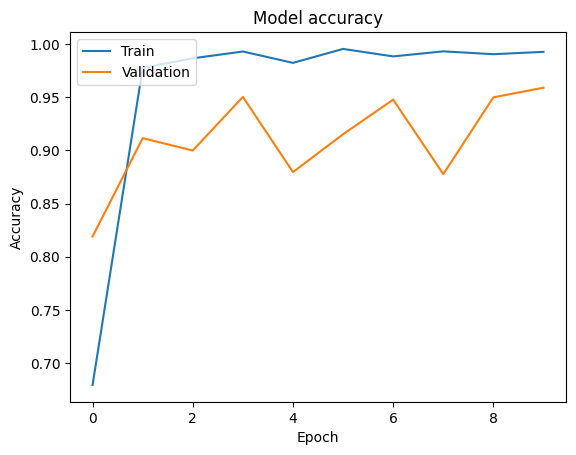

In [13]:
#apply L1 and L2 regularization
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.4f}')

#plot accuracy loss graph
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/10
592/592 [==============================] - 18s 30ms/step - loss: 2.8367 - accuracy: 0.3192 - val_loss: 0.7240 - val_accuracy: 0.8353
Epoch 2/10
592/592 [==============================] - 17s 29ms/step - loss: 1.1848 - accuracy: 0.6376 - val_loss: 0.3702 - val_accuracy: 0.9052
Epoch 3/10
592/592 [==============================] - 18s 30ms/step - loss: 0.8901 - accuracy: 0.7097 - val_loss: 0.2853 - val_accuracy: 0.9203
Epoch 4/10
592/592 [==============================] - 18s 30ms/step - loss: 0.7624 - accuracy: 0.7462 - val_loss: 0.2392 - val_accuracy: 0.9334
Epoch 5/10
592/592 [==============================] - 18s 30ms/step - loss: 0.6488 - accuracy: 0.7831 - val_loss: 0.2249 - val_accuracy: 0.9405
Epoch 6/10
592/592 [==============================] - 16s 27ms/step - loss: 0.6083 - accuracy: 0.7944 - val_loss: 0.1374 - val_accuracy: 0.9629
Epoch 7/10
592/592 [==============================] - 17s 29ms/step - loss: 0.5617 - accuracy: 0.8092 - val_loss: 0.1689 - val_accuracy:

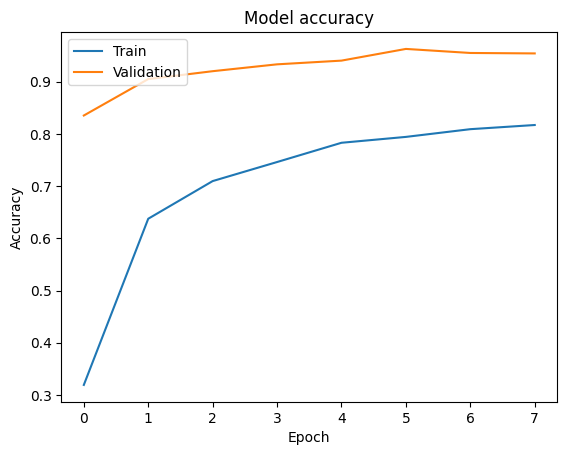

In [14]:
#dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

#early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.1, # minimium amount of change to count as an improvement
    patience=2, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Test accuracy: {test_acc:.4f}')

#plot accuracy loss graph
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

# Define paths
data_dir = 'augmented'
apple_dir = os.path.join(data_dir, 'Apple 6')
braeburn_dir = os.path.join(data_dir, 'Apple Braeburn 1')

# Image augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Prepare datasets
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Save the model
model.save('apple_classifier.h5')

print("Model trained and saved as 'apple_classifier.h5'")

Found 258 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
Epoch 1/10
8/8 [==============================] - 5s 411ms/step - loss: 0.9870 - accuracy: 0.7773 - val_loss: 0.1072 - val_accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 1s 181ms/step - loss: 0.0798 - accuracy: 0.9735 - val_loss: 2.6029e-04 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 1s 174ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.8694e-04 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 1s 187ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 5.9138e-04 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 1s 166ms/step - loss: 0.0297 - accuracy: 0.9867 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 1s 162ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 4.4998e-06 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 1s 168ms/step

# Fashion dataset classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the images
train_images, test_images = train_images / 255.0, test_images / 255.0

4422102/4422102 [==============================] - 3s 1us/step


In [2]:
# Reshape the images to add a channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [3]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 36s 11ms/step - loss: 0.5049 - accuracy: 0.8145 - val_loss: 0.3874 - val_accuracy: 0.8611
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3252 - accuracy: 0.8823 - val_loss: 0.3397 - val_accuracy: 0.8740
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2799 - accuracy: 0.8989 - val_loss: 0.3033 - val_accuracy: 0.8851
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2516 - accuracy: 0.9067 - val_loss: 0.2802 - val_accuracy: 0.9005
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2288 - accuracy: 0.9155 - val_loss: 0.2733 - val_accuracy: 0.9010
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2093 - accuracy: 0.9217 - val_loss: 0.2546 - val_accuracy: 0.9074
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1898 - accuracy: 0.9301 - val_loss: 0.2689 - val_a

1/1 [==============================] - 0s 49ms/step


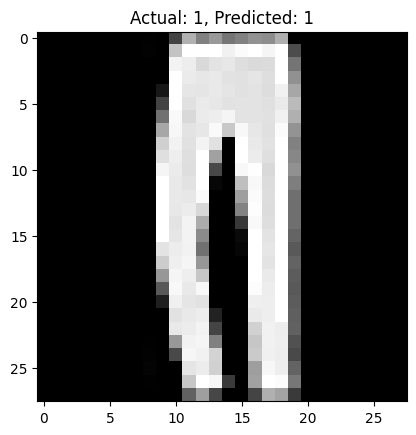

In [5]:
# Select an image from the test set
image_index = 2
test_image = test_images[image_index]
test_label = test_labels[image_index]

# Predict the class of the image
predicted_label = np.argmax(model.predict(test_image.reshape(1, 28, 28, 1)))

# Display the image and prediction
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f'Actual: {test_label}, Predicted: {predicted_label}')
plt.show()


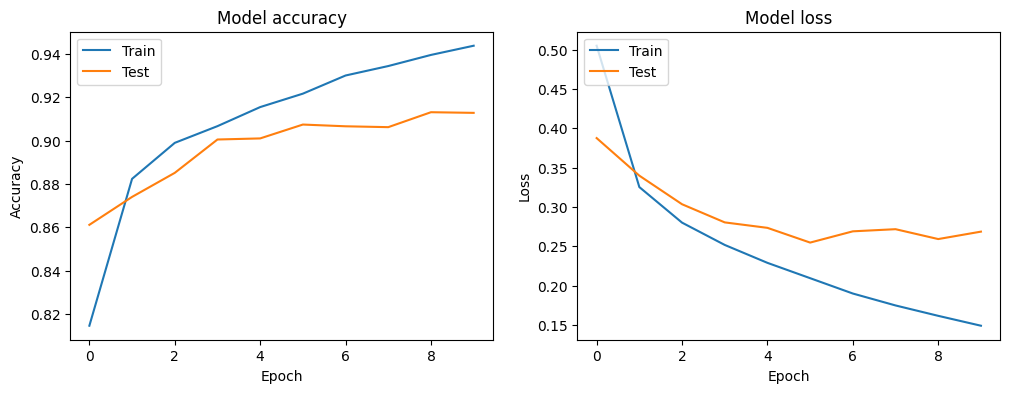

In [6]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()
